# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
customers.head() # each feature is a type of wholesale bulk item? except for Channel and Region. Region is presumably region of the country, but Channel is ambiguous

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
customers.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [4]:
customers.dtypes # so there is no categorical data to convert, all whole integers

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [6]:
customers.info() # no null values!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [10]:
# Column Collinearity
customers.corr().abs() # Grocery and Detergents_Paper have a 0.92 Correlation. So Drop one?

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,0.169172,0.460720,0.608792,0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,0.021044,0.001483,0.045212
Fresh,0.169172,0.055287,1.000000,0.100510,0.011854,0.345881,0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,0.011854,0.728335,1.000000,0.040193,0.924641,0.205497
Frozen,0.202046,0.021044,0.345881,0.123994,0.040193,1.000000,0.131525,0.390947
Detergents_Paper,0.636026,0.001483,0.101953,0.661816,0.924641,0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [30]:
def remove_highly_correlated(df, threshold = 0.8): 
    corr_matrix = df.corr().abs()
    tri = np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool)
    upper = corr_matrix.where(tri)
    to_drop = [col for col in upper.columns if any(upper[col] > threshold)]
    return df.drop(df[to_drop], axis = 1) # intentionally left off inplace = True

custdf = remove_highly_correlated(customers, threshold = 0.9)

custdf

,Channel,Region,Fresh,Milk,Grocery,Frozen,Delicassen
0,2,3,12669,9656,7561,214,1338
1,2,3,7057,9810,9568,1762,1776
2,2,3,6353,8808,7684,2405,7844
3,1,3,13265,1196,4221,6404,1788
4,2,3,22615,5410,7198,3915,5185
...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,2204
436,1,3,39228,1431,764,4510,2346
437,2,3,14531,15488,30243,437,1867
438,1,3,10290,1981,2232,1038,2125


In [31]:
# Descriptive Statistics
custdf.describe() # any outliers? is the data skewed?
# probably ought to scale this data for any meaningful insights

,Channel,Region,Fresh,Milk,Grocery,Frozen,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,47943.000000


In [32]:
# Is there a skew to the distribution of the data? Are the Classes balanced?
for col in custdf:
    print(custdf[col].value_counts())
# looks like Channel-1 has ~300 values, while Channel-2 is only ~150
# and Region 3 is way more rows than the others, with 316 compared to 77 and 47

1    298
2    142
Name: Channel, dtype: int64
3    316
1     77
2     47
Name: Region, dtype: int64
9670     2
3        2
8040     2
514      2
18044    2
        ..
8885     1
694      1
7864     1
1725     1
4098     1
Name: Fresh, Length: 433, dtype: int64
1897     2
5139     2
659      2
829      2
944      2
        ..
7845     1
3748     1
13316    1
28326    1
20484    1
Name: Milk, Length: 421, dtype: int64
1664    2
2405    2
1493    2
1563    2
3600    2
       ..
582     1
2469    1
3779    1
1733    1
3       1
Name: Grocery, Length: 430, dtype: int64
744     2
779     2
1619    2
364     2
848     2
       ..
660     1
661     1
662     1
666     1
1026    1
Name: Frozen, Length: 426, dtype: int64
834     4
3       4
548     3
1215    3
395     3
       ..
1647    1
433     1
1653    1
635     1
5120    1
Name: Delicassen, Length: 403, dtype: int64


In [ ]:
# Your observations here

# My conclusion is that we do have outliers! Additionally, features like Channel and Region are unbalanced


# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [26]:
# Your code here
# outliers are defined as anything above a value of (IQR * 1.5), and anything below a value of 
# So anything below the (Q1 minus (IQR * 1.5)), and anything above the (Q3 plus (IQR * 1.5)) can be considered an outlier
# so run a nested numpy where to boolean mask it? 


# def interquartile(df, col, k = 1.5): # pass in a df, a column name, and by default k = 1.5
#     q1 = np.percentile(df[col], 25)
#     q3 = np.percentile(df[col], 75)
#     cutoff = (q3 - q1) * k
#     lower_fence = q1 - cutoff
#     upper_fence = q3 + cutoff
#     print(lower_fence, upper_fence)
#     return df.query(f"{lower_fence} < {col} < {upper_fence}")

def interquartile(df, k = 1.5): # pass in a df, a column name, and by default k = 1.5
    for col in df.columns:
#         print(col)
        q1 = np.percentile(col, 25)
        print(q1)
#         q3 = np.percentile(df[col], 75)
#         cutoff = (q3 - q1) * k
#         lower_fence = q1 - cutoff
#         upper_fence = q3 + cutoff
#         df[col] = np.where(
#             df[col] < lower_fence, # condition
#             np.NaN, # if True
#             np.where(  # if False
#                 df[col] > upper_fence,
#                 np.NaN,
#                 col) 
#         )
#     print(lower_fence, upper_fence)
#     return df


# for col in custdf.columns:
#     interquartile(custdf, col)

# interquartile(custdf)
    


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [ ]:
# Your comment here

# skipped data cleaning for now, since there are no nulls.
# come back later to remove outliers

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [33]:
custdf

,Channel,Region,Fresh,Milk,Grocery,Frozen,Delicassen
0,2,3,12669,9656,7561,214,1338
1,2,3,7057,9810,9568,1762,1776
2,2,3,6353,8808,7684,2405,7844
3,1,3,13265,1196,4221,6404,1788
4,2,3,22615,5410,7198,3915,5185
...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,2204
436,1,3,39228,1431,764,4510,2346
437,2,3,14531,15488,30243,437,1867
438,1,3,10290,1981,2232,1038,2125


In [37]:
# Your import here:

from sklearn.preprocessing import StandardScaler


# Your code here:

customers_scale = pd.DataFrame( # create a new df out of...
    StandardScaler().fit_transform(custdf), # initalize the Scaler, then fit_transform the data
    columns = custdf.columns, # add the column names from the original 
)

customers_scale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,1.299347


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [45]:
# Your code here:
from sklearn.cluster import KMeans

kmeans = KMeans().fit(customers_scale)

customers_scale['labels_kmeans'] = kmeans.labels_

customers_scale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Delicassen,labels,labels_kmeans
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.066339,2,0
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.089151,2,0
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,2.243293,2,0
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,0.093411,0,2
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,1.299347,2,0


Count the values in `labels`.

In [46]:
# Your code here:

customers_scale['labels_kmeans'].value_counts() # so this put my data into seven clusters

2    174
0     94
1     87
3     41
7     36
4      5
5      2
6      1
Name: labels_kmeans, dtype: int64

In [47]:
customers_scale.drop(labels = 'labels', axis = 1, inplace = True)

customers_scale.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Delicassen',
       'labels_kmeans'],
      dtype='object')

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [48]:
# Your code here
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5).fit(customers_scale)

customers_scale['labels_DBSCAN'] = dbscan.labels_

Count the values in `labels_DBSCAN`.

In [49]:
# Your code here
customers_scale['labels_DBSCAN'].value_counts() # one of the labels is called negative one, so still 7 clusters

-1    225
 2    135
 0     31
 4     23
 6      7
 5      7
 1      7
 3      5
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [60]:
# Your code here:
import seaborn as sns
import matplotlib.pyplot as plt
models = ['labels_kmeans', 'labels_DBSCAN']

# Mine doesn't work for this because I dropped the highly correlated feature 'Detergents_Paper'

# fig, ax = plt.subplots(1, 2, figsize = (12, 3))



# for i, algorithm in enumerate(models): # for every key in models, return index, keyname,
#     sns.scatterplot(
#         data = customers,
#         x = 'Detergents_Paper',
#         y = 'Milk',
#         hue = algorithm,
# #         style = 'species_id',
# #         palette = ['red', 'green', 'blue', 'yellow', 'orange', 'indigo', 'violet',][:len(customers_scale[algorithm].unique())], # b/c dbscan found a different number of clusters
# #         legend = False,
#         ax = ax[i]
#     ).set_title(algorithm)
    
#     ax[i].set(xlabel = None, ylabel = None) # declutter the visualization by removing the labels on the axes



Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

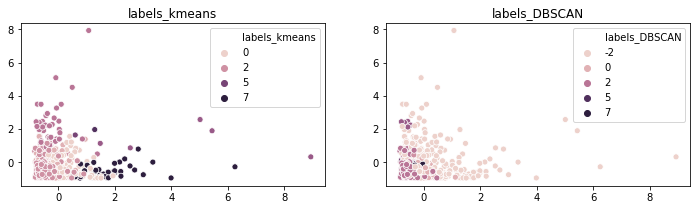

In [61]:
# Your code here:
fig, ax = plt.subplots(1, 2, figsize = (12, 3))

for i, algorithm in enumerate(models): # for every key in models, return index, keyname,
    sns.scatterplot(
        data = customers_scale,
        x = 'Grocery',
        y = 'Fresh',
        hue = algorithm,
#         style = 'species_id',
#         palette = ['red', 'green', 'blue', 'yellow', 'orange', 'indigo', 'violet',][:len(customers_scale[algorithm].unique())], # b/c dbscan found a different number of clusters
#         legend = False,
        ax = ax[i]
    ).set_title(algorithm)
    
    ax[i].set(xlabel = None, ylabel = None) # declutter the visualization by removing the labels on the axes


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

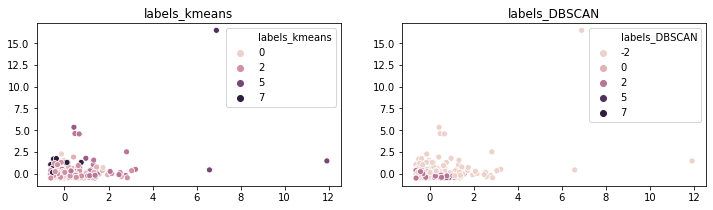

In [62]:
# Your code here:
fig, ax = plt.subplots(1, 2, figsize = (12, 3))

for i, algorithm in enumerate(models): # for every key in models, return index, keyname,
    sns.scatterplot(
        data = customers_scale,
        x = 'Frozen',
        y = 'Delicassen',
        hue = algorithm,
#         style = 'species_id',
#         palette = ['red', 'green', 'blue', 'yellow', 'orange', 'indigo', 'violet',][:len(customers_scale[algorithm].unique())], # b/c dbscan found a different number of clusters
#         legend = False,
        ax = ax[i]
    ).set_title(algorithm)
    
    ax[i].set(xlabel = None, ylabel = None) # declutter the visualization by removing the labels on the axes

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [72]:
# Your code here:
# customers_scale.groupby(['labels_kmeans', 'labels_DBSCAN']).mean()
customers_scale.groupby('labels_kmeans').mean().sum().sum()

59.13495278422035

In [71]:
customers_scale.groupby('labels_DBSCAN').mean().sum().sum()

1.0559981390444344

Which algorithm appears to perform better?

In [73]:
# Your observations here

# I don't think I understand what I'm looking at here. 

# For each cluster of Kmeans, look at every column and compute the mean.
# Then do the same for each cluster of DBSCAN. since these are Clustering algorithms, I would be looking for the smallest possible mean, right? 

# added .sum().sum() to both, and we see that DBSCAN outperforms, since its sum of means is 1.06, as opposed to Kmeans sum of means to be 59

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

# covered in class using math to get to the optimal number of clusters using KElbowVisualizer from yellowbrick

In [ ]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

covered in class, tuning these hyperparameters

In [ ]:
# Your comment here